In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from templates import *

In [3]:
device = 'cuda:0'
conf = ffhq256_autoenc()
# print(conf.name)
model = LitModel(conf)
state = torch.load(f'checkpoints/{conf.name}/last.ckpt', map_location='cpu')
model.load_state_dict(state['state_dict'], strict=False)
model.ema_model.eval()
model.ema_model.to(device);

Global seed set to 0


Model params: 160.69 M


In [4]:
data = ImageDataset('imgs_align', image_size=conf.img_size, exts=['jpg', 'JPG', 'png'], do_augment=False)
batch = data[24]['img'][None]
data2 = ImageDataset('imgs_align', image_size=conf.img_size, exts=['jpg', 'JPG', 'png'], do_augment=False)
batch2 = torch.stack([
    data[24]['img'],
    data[0]['img'],
])
data3 = ImageDataset('imgs_align', image_size=conf.img_size, exts=['jpg', 'JPG', 'png'], do_augment=False)
batch3 = torch.stack([
    data[24]['img'],
    data[0]['img'],
    data[1]['img'],
])
data4 = ImageDataset('imgs_align', image_size=conf.img_size, exts=['jpg', 'JPG', 'png'], do_augment=False)
batch4 = data[24]['img'][None]

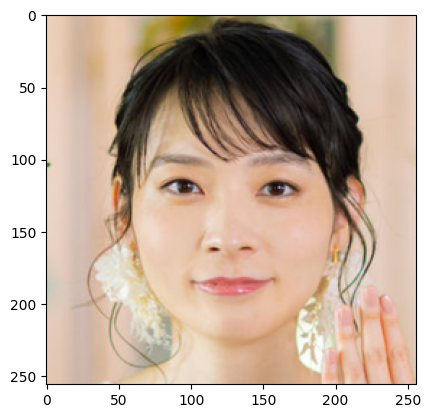

In [5]:
import matplotlib.pyplot as plt
plt.imshow(batch[0].permute([1, 2, 0]) / 2 + 0.5)

# Encode

In [6]:
conds = []
xTs = []

In [7]:
for i in range(5):
    cond = model.encode(batch2.to(device))
    xT = model.encode_stochastic(batch2.to(device), cond, T=250)
    conds.append(cond)
    xTs.append(xT)

In [25]:
cond = model.encode(batch.to(device))
xT = model.encode_stochastic(batch.to(device), cond, T=250)
cond2 = model.encode(batch2.to(device))
xT2 = model.encode_stochastic(batch2.to(device), cond, T=250)
cond3 = model.encode(batch3.to(device))
xT3 = model.encode_stochastic(batch3.to(device), cond, T=250)
cond4 = model.encode(batch4.to(device))
xT4 = model.encode_stochastic(batch4.to(device), cond, T=250)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


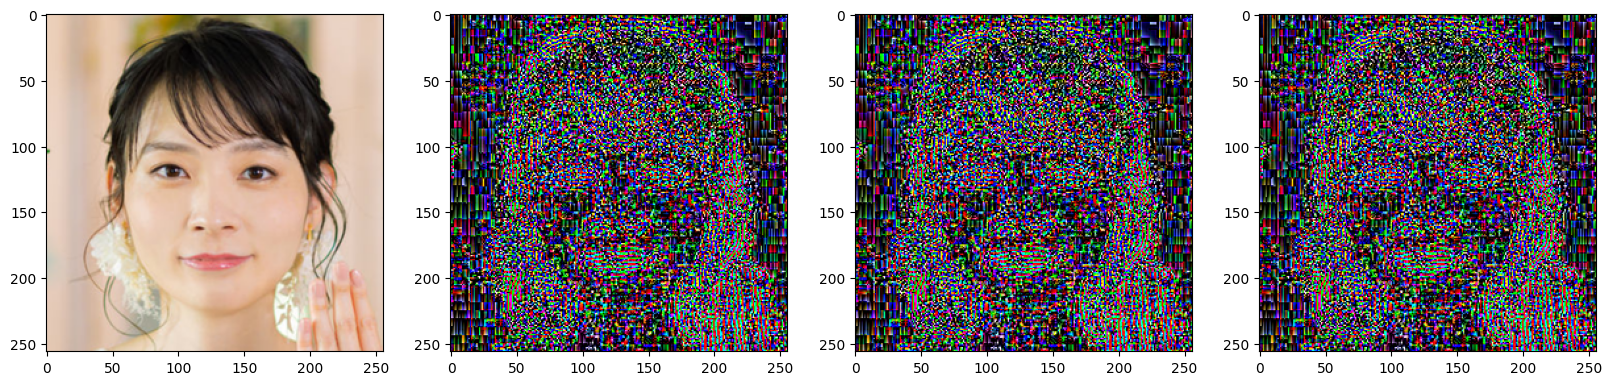

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 5, figsize=(26, 5))
ori = (batch + 1) / 2
ax[0].imshow(ori[0].permute(1, 2, 0).cpu())
ax[1].imshow(xT[0].permute(1, 2, 0).cpu())
ax[2].imshow(xT2[0].permute(1, 2, 0).cpu())
ax[3].imshow(xT3[0].permute(1, 2, 0).cpu())
ax[4].imshow(xT4[0].permute(1, 2, 0).cpu())

In [10]:
for i in range(5):
    print(torch.linalg.norm(xTs[i][0]))

tensor(447.0842, device='cuda:0')
tensor(447.0842, device='cuda:0')
tensor(447.0842, device='cuda:0')
tensor(447.0842, device='cuda:0')
tensor(447.0842, device='cuda:0')


In [35]:
print(torch.linalg.norm(xT[0]))
print(torch.linalg.norm(xT2[0]))
print(torch.linalg.norm(xT3[0]))
print(torch.linalg.norm(xT4[0]))

tensor(447.0873, device='cuda:0')
tensor(447.0878, device='cuda:0')
tensor(447.0875, device='cuda:0')
tensor(447.0873, device='cuda:0')


# Decode

In [10]:
preds = []
for i in range(5):
    pred = model.render(xTs[i], conds[i], T=20)
    preds.append(pred)

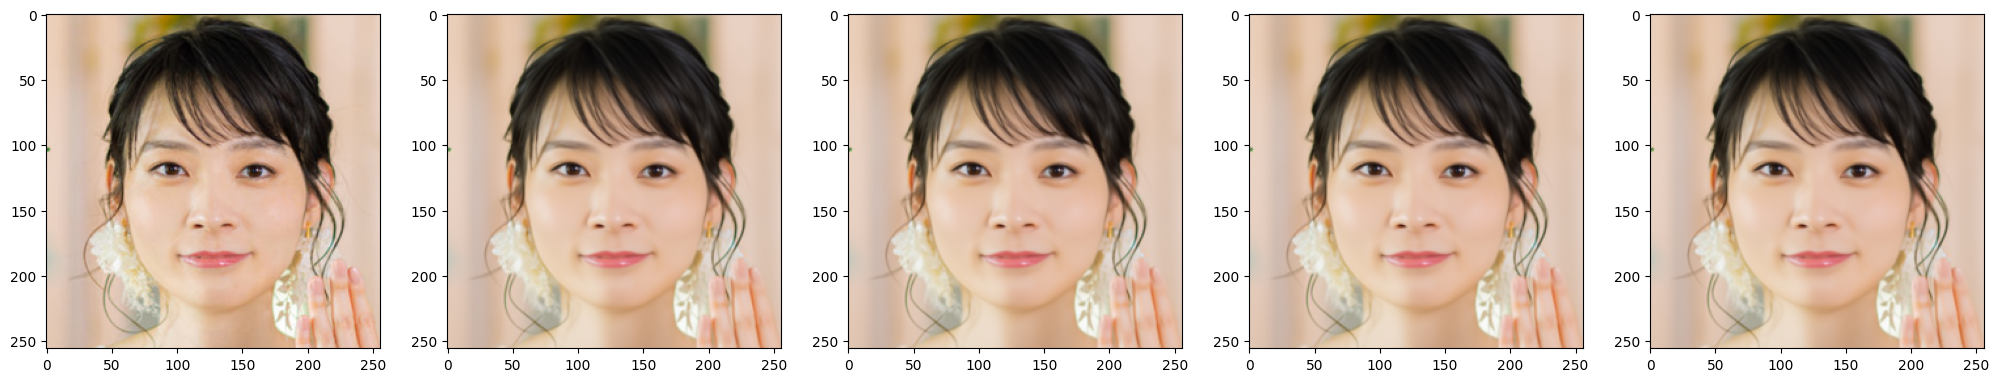

In [27]:
pred = model.render(xT, cond, T=20)
pred2 = model.render(xT2, cond2, T=20)
pred3 = model.render(xT3, cond3, T=20)
pred4 = model.render(xT4, cond4, T=20)
fig, ax = plt.subplots(1, 5, figsize=(25, 5))
ori = (batch + 1) / 2
ax[0].imshow(ori[0].permute(1, 2, 0).cpu())
ax[1].imshow(pred[0].permute(1, 2, 0).cpu())
ax[2].imshow(pred2[0].permute(1, 2, 0).cpu())
ax[3].imshow(pred3[0].permute(1, 2, 0).cpu())
ax[4].imshow(pred4[0].permute(1, 2, 0).cpu())

In [13]:
preds[0][preds[0] != preds[4]]

tensor([], device='cuda:0')